In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/devashishparmar/Documents/upGrad/LendingClubCaseStudy/loan.csv', low_memory=False)

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleansing

* As we can see, there are many columns which has all it's value as NULL. We don't need them and can be dropped

In [6]:
df.dropna(axis=1, how='all', inplace=True)

In [7]:
df.shape

(39717, 57)

* Find and delete columns with non unique values as they don't contribute to analysis

In [8]:
df.nunique()[df.nunique().values == 1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [9]:
df.drop(columns=list(df.nunique()[df.nunique().values == 1].index), inplace=True)

In [10]:
df.shape

(39717, 48)

### Let's clean few more columns which may not contribute to any outcome

In [11]:
df.dti

0        27.65
1         1.00
2         8.72
3        20.00
4        17.94
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 39717, dtype: float64

In [12]:
del_col_list = ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state',
'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
'last_credit_pull_d']

In [13]:
df.drop(columns=del_col_list, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

In [15]:
df.shape

(39717, 19)

### Cleaning rows

* We need to remove the ongoing loans as that will not contribute to our analysis

In [16]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [17]:
df = df[~(df['loan_status'] == 'Current')]

In [18]:
df.shape

(38577, 19)

### Standardizing data in few of the columns

* We need to standardize some data for example removing '%' from ['int_rate'] column 

In [19]:
df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

In [20]:
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x[:-1]))

### Treating Outliers

* Clean up records if any outliers are found

<Axes: >

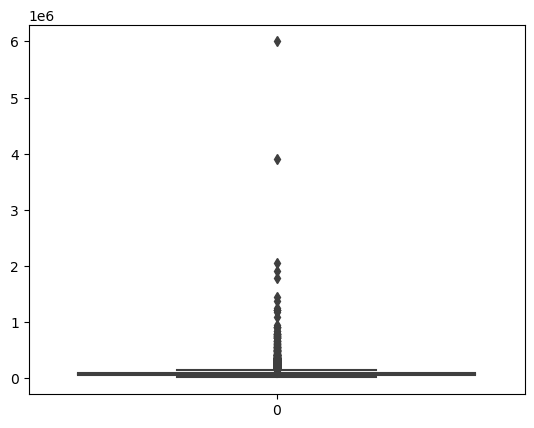

In [21]:
sns.boxplot(df['annual_inc'])

In [22]:
df['annual_inc'].quantile([0.9, 0.95, 0.98, 0.99])

0.90    115000.0
0.95    140004.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

* As we can see there are outliers in 'annual_inc'. We may remove outliers 

In [23]:
outlier = df['annual_inc'].quantile(0.95)

In [24]:
df = df[df['annual_inc'] <= outlier]

<Axes: >

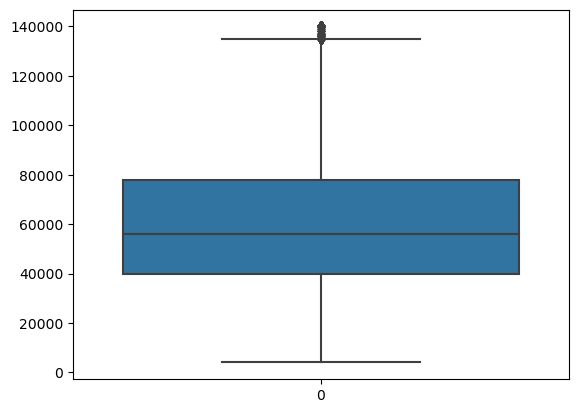

In [25]:
sns.boxplot(df['annual_inc'])

<Axes: >

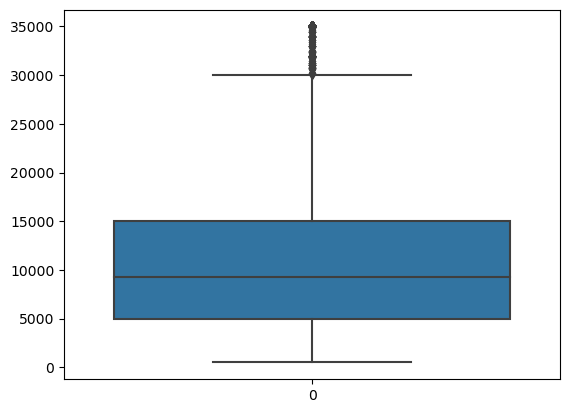

In [26]:
sns.boxplot(df['loan_amnt'])

* ['loan_amt'] : looks good 

### Data Analysis

In [27]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [28]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,700.0,36 months,8.70,158.30,B,B1,5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,credit_card,15.55,0,29,NaN
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,0,40,NaN
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,0,9,NaN
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,0,20,NaN


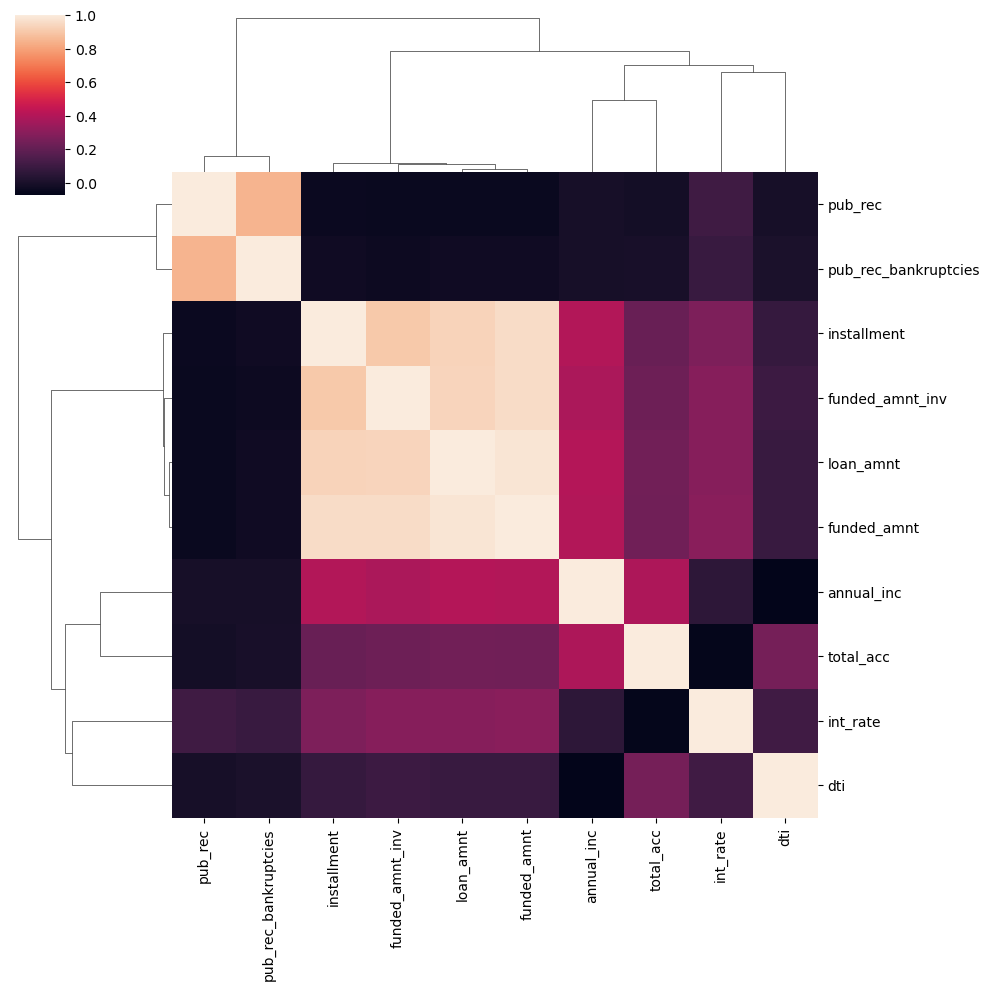

In [29]:
sns.clustermap(data=df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies']].corr())

##### From the above correlation, we can conclude below observation 

* 'pub_rec' and 'pub_rec_bankrupcies' have higher level of correlation

* 'installment', 'funded_amnt_inv', 'loan_amnt', 'funded_amnt' have high level of correlation

<Axes: xlabel='loan_status', ylabel='count'>

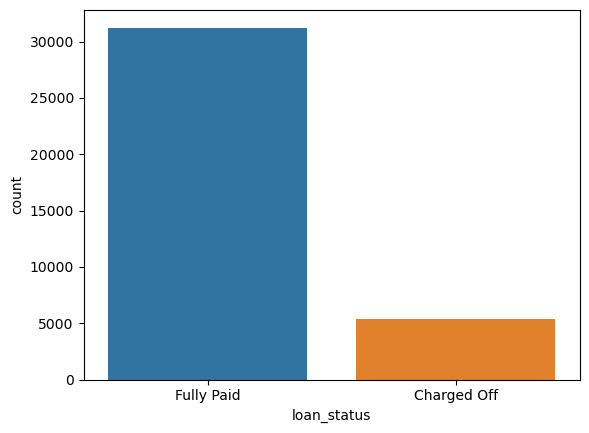

In [30]:
sns.countplot(data=df, x='loan_status')

<Axes: xlabel='home_ownership', ylabel='count'>

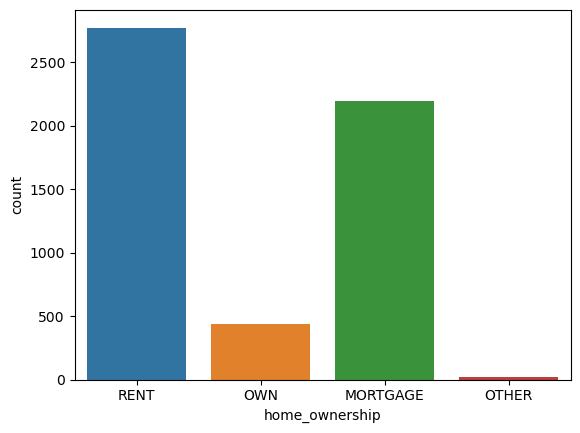

In [31]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='home_ownership')

<Axes: xlabel='count', ylabel='purpose'>

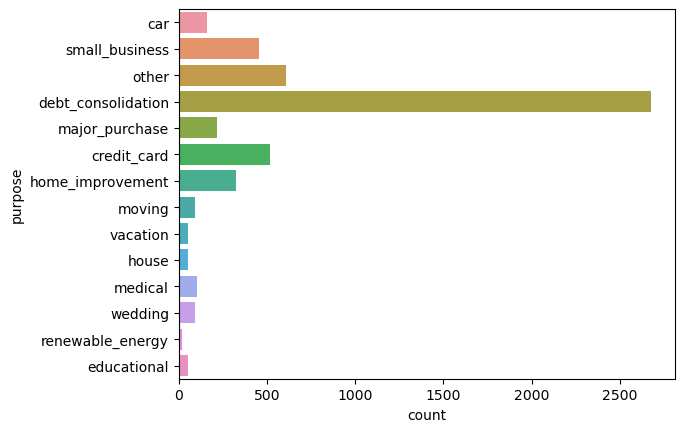

In [32]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], y='purpose')

<Axes: xlabel='count', ylabel='emp_length'>

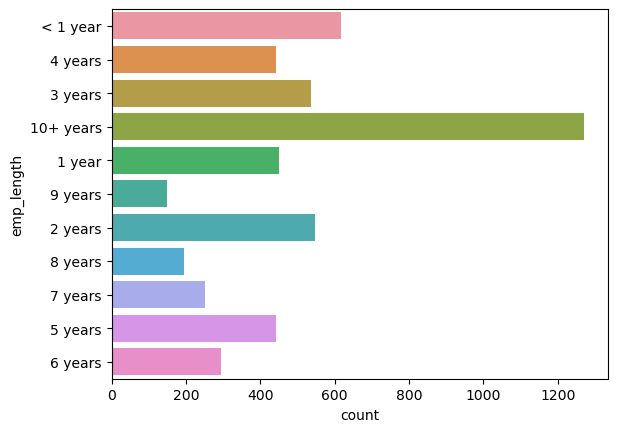

In [33]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], y='emp_length')

<Axes: xlabel='term', ylabel='count'>

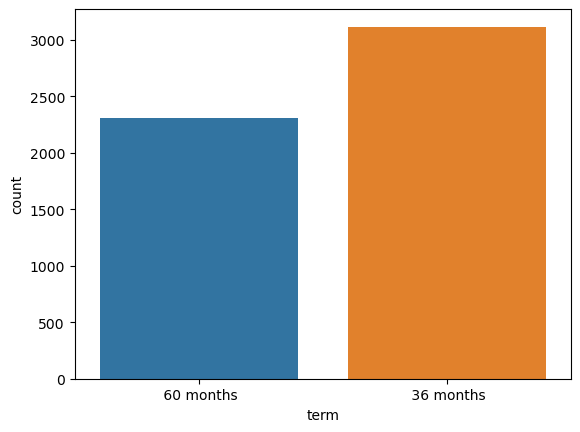

In [34]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='term')

<Axes: xlabel='verification_status', ylabel='count'>

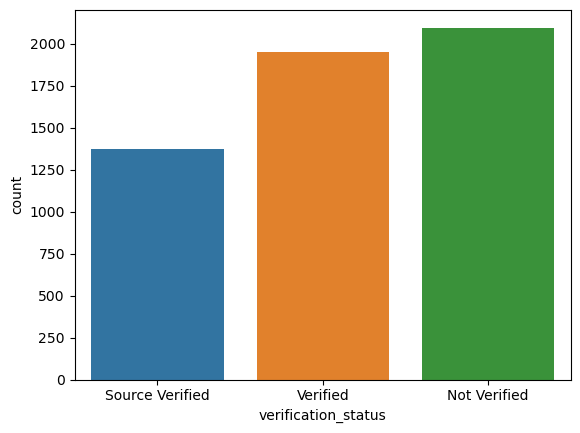

In [35]:
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='verification_status')

<Axes: xlabel='pub_rec', ylabel='count'>

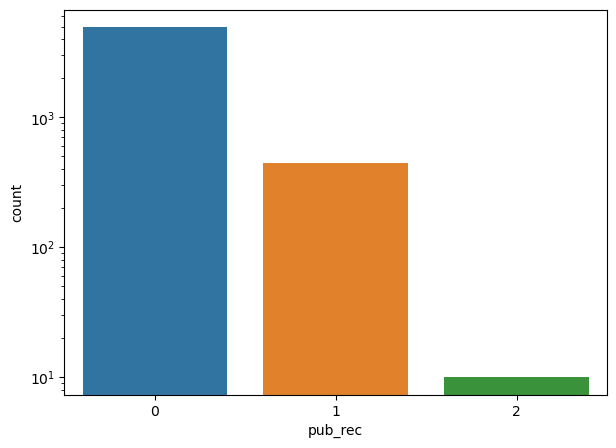

In [36]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='pub_rec')

<Axes: xlabel='annual_inc', ylabel='Count'>

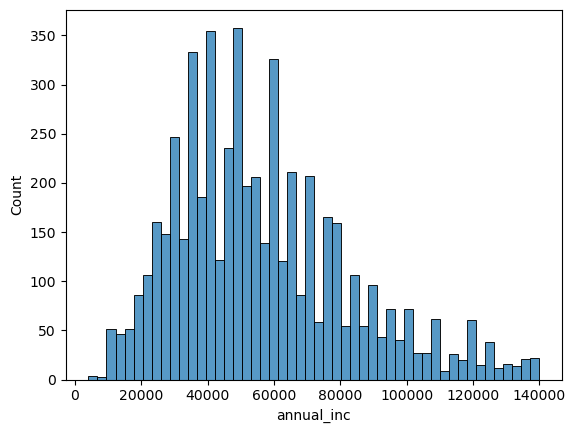

In [37]:
sns.histplot(data=df[df['loan_status']=='Charged Off']['annual_inc'], bins=50)

In [38]:
df.annual_inc.describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36654 non-null  int64  
 1   funded_amnt           36654 non-null  int64  
 2   funded_amnt_inv       36654 non-null  float64
 3   term                  36654 non-null  object 
 4   int_rate              36654 non-null  float64
 5   installment           36654 non-null  float64
 6   grade                 36654 non-null  object 
 7   sub_grade             36654 non-null  object 
 8   emp_length            35640 non-null  object 
 9   home_ownership        36654 non-null  object 
 10  annual_inc            36654 non-null  float64
 11  verification_status   36654 non-null  object 
 12  issue_d               36654 non-null  object 
 13  loan_status           36654 non-null  object 
 14  purpose               36654 non-null  object 
 15  dti                   36

#### Extract Year and Month from issue_d column and add as separate columns

In [40]:
df['issue_d'] = df['issue_d'].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [41]:
df['issue_year'] = pd.DatetimeIndex(df['issue_d']).year

In [42]:
df['issue_month'] = pd.DatetimeIndex(df['issue_d']).month

<Axes: xlabel='issue_month', ylabel='count'>

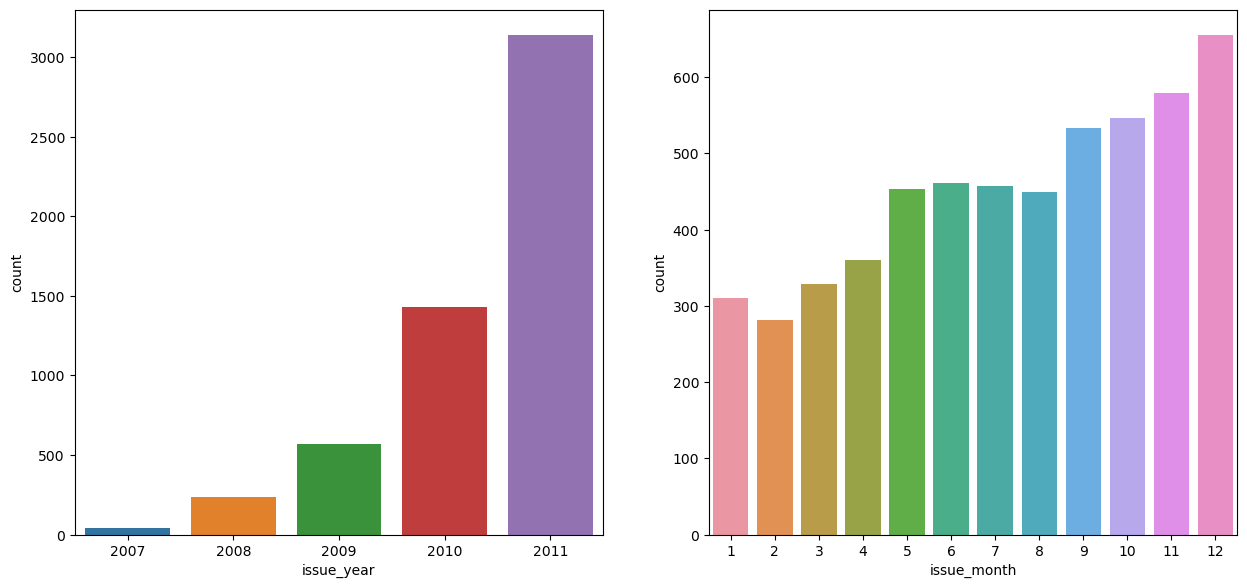

In [43]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='issue_year')

plt.subplot(222)
sns.countplot(data=df[df['loan_status']=='Charged Off'], x='issue_month')

# Observations
### Based on correlation graph below are the observations
- There is high degree of correlation between 'pub_rec' and 'pub_rec_bankruptcies'
- There is high degree of correlation between 'installment', 'funded_amnt_inv', 'loan_amnt' and 'funded_amnt'

### Based on above countplots the probablity of customers defaulting is when

- Customers having house_ownership as 'RENT'
- When the purpose is 'debt_consolidation'
- Customers with employement length of 10
- Customers availaing term of 36 months
- When the loan status is 'Not verified'
- When the number of derogatory public records is 0
- When the 'annual_inc' is in the range of 35K - 60K appx